----

# Optimizacion de los gastos de marketing de Y.Afisha

## Objetivo

 El proposito de este proyecto es investigar:
 
* cómo la gente usa el producto
* cuándo empiezan a comprar
* cuánto dinero trae cada cliente
* cuándo pagan


## Tabla de contenidos 

Etapa 1. Descarga de datos y preparacion para el análisis
    
* Conclusion Etapa 1

Etapa 2.Informes y calculo de métricas 


Etapa 3. Conclusion

## 1. Apertura de archivos de datos y analisis de la información general.

Importamos librerias

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

Importamos archivos

In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv', nrows=500)

Analizaremos los datos con el método .info(). Para encontrar el tamaño exacto de los datos, agregaremos el parámetro memory_usage = 'deep'

In [3]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     500 non-null    object
 1   End Ts     500 non-null    object
 2   Source Id  500 non-null    int64 
 3   Start Ts   500 non-null    object
 4   Uid        500 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 113.1 KB


El tamaño de los datos descargados es de 113.1 kb. Tendremos esta información en cuenta para compararla con el tamaño de los datos optimizados. Vamos a analizar las columnas para determinar los cambios pertinentes. Tambien se convertira el formato del nombre de las columnas. 

In [4]:
visits['Device'].value_counts()

desktop    363
touch      137
Name: Device, dtype: int64

 Covertiremos 'Device'  al tipo `category`, usando el método 'category' para eficientizar el uso de espacio y convertiremos texto en fecha con parse_dates para 'End Ts'. Tambien se convertira el formato del nombre de las columnas y se eliminaran los espacios en blanco. 

In [5]:
visits = pd.read_csv(
    '/datasets/visits_log_us.csv',
    dtype={'Device': 'category'},
    parse_dates=['Start Ts', 'End Ts'],
)
visits.info()
visits.rename(str.lower, axis=1, inplace=True)
visits.rename(columns={'end ts': 'end_ts', 'source id': 'source_id',
                       'start ts': 'start_ts'}, inplace=True)
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

In [6]:
visits.duplicated().sum()

0

Vamos a hacer los mismo para los otros dos archivos:
### Orders

In [7]:
orders = pd.read_csv( '/datasets/orders_log_us.csv', nrows=500,)
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   500 non-null    object 
 1   Revenue  500 non-null    float64
 2   Uid      500 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 45.0 KB


In [8]:
orders = pd.read_csv(
    '/datasets/orders_log_us.csv',
    parse_dates=['Buy Ts']
)
orders.info(memory_usage='deep')
orders.rename(str.lower, axis=1, inplace=True)
orders.rename(columns={'buy ts': 'buy_ts'}, inplace=True)
orders.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


buy_ts  revenue                   uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450

In [9]:
visits.duplicated().sum()

0

### Costs

In [10]:
costs = pd.read_csv('/datasets/costs_us.csv', nrows=500)
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  500 non-null    int64  
 1   dt         500 non-null    object 
 2   costs      500 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 40.7 KB


In [11]:
costs['source_id'].value_counts()

1    363
2    137
Name: source_id, dtype: int64

In [12]:
costs=pd.read_csv('/datasets/costs_us.csv',
                  dtype={'source_id': 'category'},
                  parse_dates=['dt'])
costs.info(memory_usage='deep')
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   category      
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 43.0 KB


source_id         dt  costs
0         1 2017-06-01  75.20
1         1 2017-06-02  62.25
2         1 2017-06-03  36.53
3         1 2017-06-04  55.00
4         1 2017-06-05  57.08

In [13]:
visits.duplicated().sum()

0

### Conclusion:
    
  Se optimizo el uso de la memoria convirtiendo el tipo de datos de objeto en tipos de categoría y datetime. También se modifico  el nombre de ciertas columnas, dandole uniformidad al formato de los archivos. No se encontraron duplicados en los data frames.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien con la revisión inicial de datos!
</div>

# 2. Informes y métricas 

Producto:
* ¿Cuántas personas lo usan cada día, semana y mes?
* ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).
* ¿Cuál es la duración de cada sesión?
* ¿Con qué frecuencia los usuarios y las usuarias regresan?

Vamos a empezar con la pregunta **¿Cuántas personas lo usan cada día, semana y mes?**

Para esto se crearan columnas por separado para los valores de año, mes y semana.

In [14]:
visits.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

In [15]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.isocalendar().week
visits['session_date'] = visits['start_ts'].dt.date
display(visits.head())

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  session_year  session_month  session_week  \
0  16879256277535980062          2017             12            51   
1    104060357244891740          2018              2             8   
2   7459035603376831527          2017              7            26   
3  16174680259334210214          2018              5            20   
4   9969694820036681168          2017             12            52   

  session_date  
0   2017-12-20  
1   2018-02-19  
2   2017-07-01  
3   2018-05-20  
4   2017-12-27

Separemos los datos en tipos de dispositivos:

In [16]:
visits_touch = visits.loc[visits.device == 'touch']
visits_desktop = visits.loc[visits.device == 'desktop']

In [17]:
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()

In [18]:
print('Usuarios por día:', int(dau_total))
print('Usuarios por semana:', int(wau_total))
print('Usuarios por mes:', int(mau_total))

Usuarios por día: 907
Usuarios por semana: 5716
Usuarios por mes: 23228


### Sesiones promedio por día

In [19]:
daily_sessions_total = visits.groupby('session_date').agg({'uid':'count'}).mean()
print('Sesiones promedio por dia:', int(daily_sessions_total))

Sesiones promedio por dia: 987


**DAU - Daily Average Users**

Veamos como se distribuyen los usuarios diarios por fecha.

In [20]:
#agregamos session_year a los datos para que se muestre por ano
dau=visits.groupby(['session_year','session_date'])['uid'].nunique().reset_index()
dau.head()

session_year session_date  uid
0          2017   2017-06-01  605
1          2017   2017-06-02  608
2          2017   2017-06-03  445
3          2017   2017-06-04  476
4          2017   2017-06-05  820

In [21]:
#trazamos grafico  
fig = px.line(dau,x='session_date', y='uid', color='session_year', title='Promedio de usuarios diarios"(DAU)')
#agregamos linea de referencia con el DAU promedio
fig.add_hline(y=dau['uid'].mean(),line_dash="dash", line_color="purple", annotation_text="Average DAU",
             annotation_position="top left")
fig.show()

A primera instancia se observa que la mayoria de lo datos estan por encima del DAU promedio. Entre junio y finales de septiembre las visitas estivueron por debajo del DAU. El 24 de noviembre se presento el pico mas alto de actividad. Esto se pudo haber sido por diferentes motivos como pre-ventas o promociones festivas. Sin embargo, necesitariamos mas datos para saber con certeza. Otro pico de actividad interesante es el del 31 de marzo. Quizas una falla en el servidor causo esa caida tan drastica de usuarios?

**WAU - Weekly Average Users**

In [22]:
wau=visits.groupby(['session_year','session_week'])['uid'].nunique().reset_index()
wau.head()

session_year  session_week   uid
0          2017            22  2021
1          2017            23  4129
2          2017            24  2812
3          2017            25  2878
4          2017            26  3064

In [23]:
#trazamos grafico  
fig = px.line(wau,x='session_week', y='uid', color='session_year', title='Promedio de usuarios semanales "WAU"')
#agregamos linea de referencia con el DAU promedio
fig.add_hline(y=wau['uid'].mean(),line_dash="dash", line_color="purple", annotation_text="Average WAU",
             annotation_position="top left")
fig.show()

Aquí puede ver claramente los años separados. Si nos enfocamos en 2017, se puede ver que mas de la mitad del tiempo, el promedio semanal de usuarios estuvo por debajo del promedio. Esto podría deberse a la fase de inicio del sitio y conforme se hizo conocido, gano mas visitantes.

En 2018 los datos están más establecidos y la mayoría de los usuarios están por encima o cerca de la media. Se necesita más información para explicar mejor la caída inusual de usuarios a finales de marzo. Entre la senana 14 y 22 se mantuvo la tendencia de usuarios por debajo del WAU. Es posible que la empresa haya tenido algún tipo de fuerza externa, como problemas con el servidor o la empresa.

**MAU - Monthly Average Users**

In [24]:
mau=visits.groupby(['session_year','session_month'])['uid'].nunique().reset_index()
mau.head()

session_year  session_month    uid
0          2017              6  13259
1          2017              7  14183
2          2017              8  11631
3          2017              9  18975
4          2017             10  29692

In [25]:
fig = px.line(mau,x='session_month', y='uid', color='session_year', title='Promedio de usuarios mensuales (MAU)')

fig.add_hline(y=mau['uid'].mean(),line_dash="dash", line_color="purple", annotation_text="Average MAU",
             annotation_position="top left")
fig.show()

La brecha se debe al cambio de años y a que los datos de diciembre no van a final de mes. Los gráficos del usuario promedio son simplemente variaciones diferentes de la misma fecha. Hay una disminución notable que comienza a ocurrir entre marzo y abril de 2018.

### ¿Cuántas sesiones hay por día?

In [26]:

sessions_per_user =visits.groupby(['session_date']).agg({'uid': ['count', 'nunique']})
sessions_per_user.columns = ['no._sessions', 'no._visitors']
sessions_per_user['sessions_per_user'] = (sessions_per_user['no._sessions'] / sessions_per_user['no._visitors'])
overview = pd.merge(visits, orders, on = 'uid', how = "inner")
sessions_per_user.round(2) 

no._sessions  no._visitors  sessions_per_user
session_date                                               
2017-06-01             664           605               1.10
2017-06-02             658           608               1.08
2017-06-03             477           445               1.07
2017-06-04             510           476               1.07
2017-06-05             893           820               1.09
...                    ...           ...                ...
2018-05-27             672           620               1.08
2018-05-28            1156          1039               1.11
2018-05-29            1035           948               1.09
2018-05-30            1410          1289               1.09
2018-05-31            2256          1997               1.13

[364 rows x 3 columns]

In [27]:
#Sesiones por dia
d_ses=visits.groupby(['session_date'])['uid'].count().reset_index()
d_ses.rename(columns={'uid':'#daily_sessions'}, inplace=True)
d_ses

session_date  #daily_sessions
0     2017-06-01              664
1     2017-06-02              658
2     2017-06-03              477
3     2017-06-04              510
4     2017-06-05              893
..           ...              ...
359   2018-05-27              672
360   2018-05-28             1156
361   2018-05-29             1035
362   2018-05-30             1410
363   2018-05-31             2256

[364 rows x 2 columns]

Este snapshot de datos nos permite ver que el numero de sesiones en 2018 tuvo un incremento drastico. Podemos asumir a que conforme se establecia la plataforma y se daba conocer al publica, se incrementaron los numeros.

In [28]:
#graficamos sesiones por usuario con linea de uso promedio
fig = px.line(sessions_per_user, y='sessions_per_user')
fig.add_hline(y=sessions_per_user['sessions_per_user'].mean(),line_dash="dash", line_color="purple", annotation_text="Average Sessions Per User",
             annotation_position="top left")
fig.update_layout(title_text="Sesiones por usuario")
fig.show()

### Duración de cada sesión

In [29]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits.head(2)

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   

                    uid  session_year  session_month  session_week  \
0  16879256277535980062          2017             12            51   
1    104060357244891740          2018              2             8   

  session_date  session_duration_sec  
0   2017-12-20                  1080  
1   2018-02-19                  1680

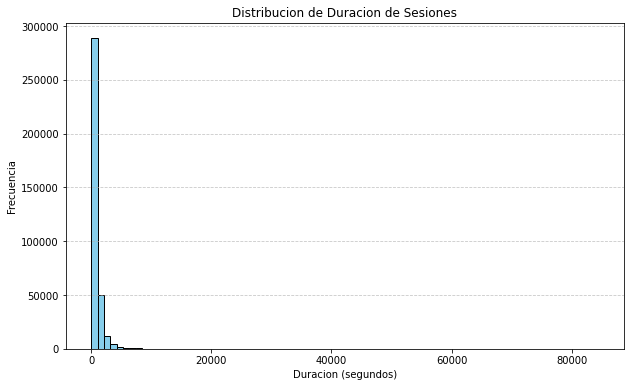

In [30]:
plt.figure(figsize=(10, 6))

# Plot the histogram
plt.hist(visits['session_duration_sec'], bins=80, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Duracion (segundos)')
plt.ylabel('Frecuencia')
plt.title('Distribucion de Duracion de Sesiones')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

Podemos ver que la distribucion de duracion de sesion no es normal, por lo que es necesario utilizar la moda en lugar de la media.Veamos la duracion promedio por sesion:

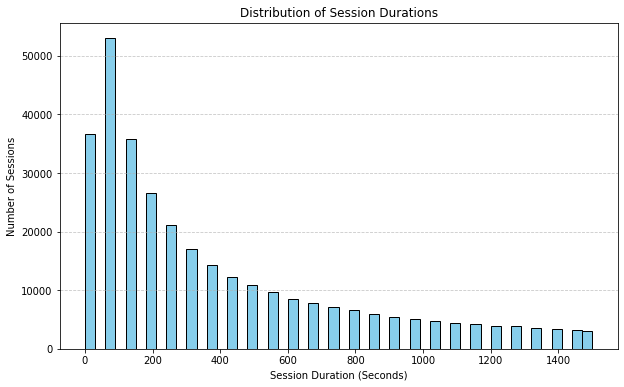

Average Session Length is: 643.506488592098
Median Session Length is: 300.0
Mode of Session Length is: 60

Top 10 Session Durations (in seconds):
60     53029
0      35794
120    35748
180    26672
240    21085
300    17005
360    14316
420    12301
480    10973
540     9722
Name: session_duration_sec, dtype: int64


In [31]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
plt.figure(figsize=(10, 6))
plt.hist(visits['session_duration_sec'], bins=50, range=(0, 1500), color='skyblue', edgecolor='black')


plt.title("Distribution of Session Durations")
plt.xlabel("Session Duration (Seconds)")
plt.ylabel("Number of Sessions")


plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#estadisticas adicionales
print("Average Session Length is:", visits['session_duration_sec'].mean())
print("Median Session Length is:", visits['session_duration_sec'].median())
print("Mode of Session Length is:", visits['session_duration_sec'].mode().iloc[0])
print("\nTop 10 Session Durations (in seconds):")
print(visits['session_duration_sec'].value_counts().head(10))

En promedio, un usuario pasa 1 minuto/60 segundos en la aplicación. Este tiempo debería ser suficiente para encontrar el evento de interés, pero lo más probable es que lleve más tiempo comprar entradas a través de la aplicación Yandex.Afisha. Seria necesario analziar  si las personas pierden por completo el interés en lo que han encontrado o recurren a otros recursos para comprar un boleto.

### Sticky Factor - Usuarios activos por periodo

In [32]:
sticky_wau = dau_total/wau_total*100
sticky_mau = dau_total/mau_total*100

print('Weekly sticky factor:',"%.2f" % sticky_wau, '%')
print('Monthly sticky factor:',"%.2f" % sticky_mau, '%')

Weekly sticky factor: 15.88 %
Monthly sticky factor: 3.91 %


El sticky factor tanto semanal como mensual indican poca lealtad del consumidor. Habra que ver la manera de hacer cambios para mejorar estos indicadores.


###  Frecuencia con la que los usuarios y las usuarias regresan

In [33]:
visits.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  session_year  session_month  session_week  \
0  16879256277535980062          2017             12            51   
1    104060357244891740          2018              2             8   
2   7459035603376831527          2017              7            26   
3  16174680259334210214          2018              5            20   
4   9969694820036681168          2017             12            52   

  session_date  session_duration_sec  
0   2017-12-20                  1080  
1   2018-02-19                  1680  
2   2017-07-01                     0  
3   2018-05-20                  1440  
4   2017-12-27                     0

Se definirá el evento y el periodo para crear los cohortes. Se formaran basados en el la primera visita del usuario.

In [34]:
first_visit_date = visits.groupby('uid')['session_date'].min()
first_visit_date.name = 'first_visit_date'
visits = visits.merge(first_visit_date, on='uid', how= 'inner')
visits.head(2)

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   

                    uid  session_year  session_month  session_week  \
0  16879256277535980062          2017             12            51   
1    104060357244891740          2018              2             8   

  session_date  session_duration_sec first_visit_date  
0   2017-12-20                  1080       2017-12-20  
1   2018-02-19                  1680       2018-02-19

Formacion de cohortes por mes de visita

In [35]:
visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]')
visits['visit_month']= visits['session_date'].astype('datetime64[M]')

Veamos los cambios en la cantidad de visitantes.

In [36]:
absolute_values = visits.pivot_table(index='first_visit_month', 
                                     columns='visit_month',
                                     values='uid', 
                                     aggfunc='nunique'
)
absolute_values

visit_month        2017-06-01  2017-07-01  2017-08-01  2017-09-01  2017-10-01  \
first_visit_month                                                               
2017-06-01            13259.0      1043.0       713.0       814.0       909.0   
2017-07-01                NaN     13140.0       737.0       674.0       738.0   
2017-08-01                NaN         NaN     10181.0       783.0       640.0   
2017-09-01                NaN         NaN         NaN     16704.0      1428.0   
2017-10-01                NaN         NaN         NaN         NaN     25977.0   
2017-11-01                NaN         NaN         NaN         NaN         NaN   
2017-12-01                NaN         NaN         NaN         NaN         NaN   
2018-01-01                NaN         NaN         NaN         NaN         NaN   
2018-02-01                NaN         NaN         NaN         NaN         NaN   
2018-03-01                NaN         NaN         NaN         NaN         NaN   
2018-04-01                NaN         NaN         NaN         NaN         NaN   
2018-05-01                NaN         NaN         NaN         NaN         NaN   

visit_month        2017-11-01  2017-12-01  2018-01-01  2018-02-01  2018-03-01  \
first_visit_month                                                               
2017-06-01              947.0       809.0       766.0       694.0       674.0   
2017-07-01              765.0       633.0       596.0       601.0       510.0   
2017-08-01              639.0       510.0       448.0       370.0       402.0   
2017-09-01             1156.0       847.0       658.0       632.0       599.0   
2017-10-01             2042.0      1357.0      1012.0       890.0       837.0   
2017-11-01            27248.0      2133.0      1202.0      1054.0       919.0   
2017-12-01                NaN     25268.0      1410.0       960.0       786.0   
2018-01-01                NaN         NaN     22624.0      1351.0       890.0   
2018-02-01                NaN         NaN         NaN     22197.0      1267.0   
2018-03-01                NaN         NaN         NaN         NaN     20589.0   
2018-04-01                NaN         NaN         NaN         NaN         NaN   
2018-05-01                NaN         NaN         NaN         NaN         NaN   

visit_month        2018-04-01  2018-05-01  
first_visit_month                          
2017-06-01              539.0       596.0  
2017-07-01              376.0       361.0  
2017-08-01              284.0       265.0  
2017-09-01              404.0       381.0  
2017-10-01              555.0       529.0  
2017-11-01              638.0       594.0  
2017-12-01              512.0       481.0  
2018-01-01              565.0       458.0  
2018-02-01              565.0       446.0  
2018-03-01              861.0       557.0  
2018-04-01            15709.0       760.0  
2018-05-01                NaN     15273.0

In [37]:

visits['first_visit_month']= visits['first_visit_date'].astype('datetime64[M]')
visits['visit_month']= visits['session_date'].astype('datetime64[M]')

In [38]:
visits['cohort_lifetime'] = visits['visit_month'] - visits['first_visit_month']

visits['cohort_lifetime'] = visits['cohort_lifetime']/np.timedelta64(1, 'M')

visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

cohorts= visits.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

initial_user_count = cohorts[cohorts['cohort_lifetime']==0][['first_visit_month','uid']]
initial_user_count = initial_user_count.rename(columns={'uid':'cohort_users'})
cohorts= cohorts.merge(initial_user_count, on='first_visit_month')
cohorts['retention']= cohorts['uid']/cohorts['cohort_users']

In [39]:
#creamos tabla pivote para tasa de retencion
cohorts['months']=cohorts['first_visit_month'].dt.strftime('%Y-%m')
retention_pivot =cohorts.pivot_table(index='months', columns='cohort_lifetime', values='retention', aggfunc='sum')
retention_pivot.mean(axis=0)

cohort_lifetime
0     1.000000
1     0.065167
2     0.046333
3     0.042760
4     0.040595
5     0.039444
6     0.036957
7     0.037509
8     0.035465
9     0.035159
10    0.034062
11    0.044951
dtype: float64

<AxesSubplot:title={'center':'User Retention'}, xlabel='cohort_lifetime', ylabel='months'>

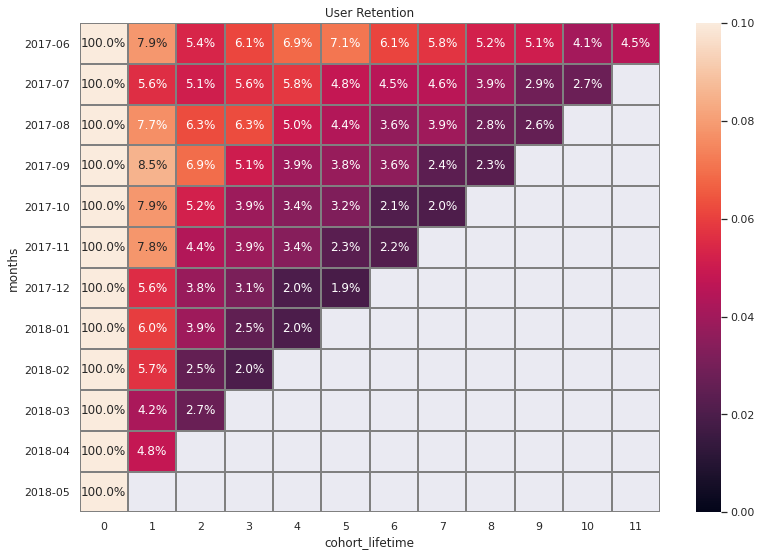

In [40]:
#creacion de mapa de calor para tasa de retencion
sns.set(style='dark')
plt.figure(figsize=(13,9))
plt.title('User Retention')
sns.heatmap(retention_pivot, annot=True, fmt= '.1%', linewidth= 1, linecolor='gray', vmax= 0.1, vmin=0)

### Conclusion

La tasa de retención promedio de todas las cohortes disminuyó lentamente con el tiempo. Uno de los pocos meses que mantuvo un porcentaje de usuarios algo estable fue junio. A julio, agosto y septiembre les fue mejor que al resto de los meses, ya que pudieron tener un promedio ligeramente más alto durante la mayor parte del mes. Hacia finales de 2018 la tasa tuvo una tendencia decreciente.

Conclusión del análisis del producto:

Yandex.Afisha ve un promedio de 900 usuarios diariamente y cada usuario tiene alrededor de 1 sesión. El tiempo de permanencia en el sitio para esa sesión es de unos 10 minutos. Hubo un aumento significativo de usuarios alrededor del 24 de noviembre/día de Acción de Gracias, lo que podría atribuirse a la temporada navideña. El 24 y 25 de noviembre es también uno de los días de mayores compras del año, como precursor de la Navidad. Es posible que los boletos se hayan comprado como obsequio, pero se necesitaría más información del usuario para determinarlo. El aumento de usuarios también coincide con un aumento en la duración de la sesión a casi 18 minutos. El sitio se ha ralentizado debido al tráfico del servidor.
Un área de preocupación es la caída tanto de los usuarios como de la duración de las sesiones que se produjo alrededor del 31 de marzo. Con una disminución tan pronunciada tanto en los usuarios como en la duración de las sesiones, es posible que hayan ocurrido algunas cosas. Podría ser una falla del sitio, mantenimiento del sitio o eliminación voluntaria/involuntaria del sitio, pero nuevamente, se necesitaría más información para llegar a una conclusión sólida.

## Ventas

### ¿Cuándo empieza a comprar la gente?

In [41]:
visits.head(2)

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   

                    uid  session_year  session_month  session_week  \
0  16879256277535980062          2017             12            51   
1    104060357244891740          2018              2             8   

  session_date  session_duration_sec first_visit_date first_visit_month  \
0   2017-12-20                  1080       2017-12-20        2017-12-01   
1   2018-02-19                  1680       2018-02-19        2018-02-01   

  visit_month  cohort_lifetime  
0  2017-12-01                0  
1  2018-02-01                0

In [42]:
orders.head(2)
orders.shape

(50415, 3)

In [43]:
first_order_dates = orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()
first_order_dates.columns= ['uid','first_order_date']

first_session_dates = visits.groupby('uid').agg({'start_ts':'min'}).reset_index()
first_session_dates.columns= ['uid','first_session_date']
first_order_dates.shape

(36523, 2)

In [44]:
first_order_dates_v2 = first_order_dates.merge(orders, left_on = ['uid','first_order_date'], right_on = ['uid','buy_ts'], how = 'inner')
first_order_dates_v2 = first_order_dates_v2[['uid','first_order_date','revenue']]
first_order_dates_v2.shape

(36523, 3)

In [45]:
first_order_dates_v2.head()

uid    first_order_date  revenue
0   313578113262317 2018-01-03 21:51:00     0.55
1  1575281904278712 2017-06-03 10:13:00     1.22
2  2429014661409475 2017-10-11 18:33:00    73.33
3  2464366381792757 2018-01-28 15:54:00     2.44
4  2551852515556206 2017-11-24 10:14:00     6.32

In [46]:
conversion = pd.merge(first_session_dates, first_order_dates, on = 'uid')
conversion['conversion_time_days'] = (conversion['first_order_date'] - conversion['first_session_date']).dt.days

In [47]:
conversion.head(2)

uid  first_session_date    first_order_date  \
0   313578113262317 2017-09-18 22:49:00 2018-01-03 21:51:00   
1  1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00   

   conversion_time_days  
0                   106  
1                     0

In [48]:
conversion['first_session_month'] = conversion['first_session_date'].astype('datetime64[M]')

In [49]:
conversion.columns

Index(['uid', 'first_session_date', 'first_order_date', 'conversion_time_days',
       'first_session_month'],
      dtype='object')

In [50]:
conversion_cohorts = conversion.groupby(['first_session_month','conversion_time_days']).agg({'uid':'nunique'}).reset_index()

In [51]:
# Define a function to group the days until the first purchase
def days_until_first_order(days):
    if days == 0:
        return 'Conversion 0d'
    elif days == 1:
        return 'Conversion 1d'
    elif days == 2:
        return 'Conversion 2d'
    elif days == 3:
        return 'Conversion 3d'
    elif days == 4:
        return 'Conversion 4d'
    elif days == 5:
        return 'Conversion 5d'
    else:
        return 'Mas de 5 dias'

# Apply the function and create the column 'days_to_order_group'
conversion['conversion_time_days'] = conversion['conversion_time_days'].apply(days_until_first_order)

# Merge with 'device' and 'source_id'
merged_data = pd.merge(conversion, visits[['uid', 'device', 'source_id']].drop_duplicates(), on='uid')

# Create pivot table with 'device' and 'source_id'
visits_orders_pivot = merged_data.pivot_table(index=['device', 'source_id'], columns= 'conversion_time_days', values='uid', aggfunc='nunique', fill_value=0)


# Display pivot table
visits_orders_pivot

conversion_time_days  Conversion 0d  Conversion 1d  Conversion 2d  \
device  source_id                                                   
desktop 1                      3292            248            112   
        2                      3124            203            106   
        3                      7623            352            203   
        4                      7225            335            190   
        5                      5838            217            106   
        7                         1              0              0   
        9                      1202             62             34   
        10                      953             63             19   
touch   1                       962             82             58   
        2                      1032             91             46   
        3                      1537             90             68   
        4                      2054            131             86   
        5                      1128             75             45   
        7                         0              0              0   
        9                       313             18             19   
        10                      225             23             15   

conversion_time_days  Conversion 3d  Conversion 4d  Conversion 5d  \
device  source_id                                                   
desktop 1                        87             71             57   
        2                       101             66             75   
        3                       154            124             94   
        4                       166            118            108   
        5                        99             90             62   
        7                         0              0              0   
        9                        27             22             20   
        10                       14             11             18   
touch   1                        37             31             25   
        2                        41             28             25   
        3                        54             30             28   
        4                        68             40             54   
        5                        33             20             13   
        7                         0              0              0   
        9                         6              7              6   
        10                        4              4              5   

conversion_time_days  Mas de 5 dias  
device  source_id                    
desktop 1                      1666  
        2                      1984  
        3                      3099  
        4                      3011  
        5                      2061  
        7                         0  
        9                       891  
        10                      335  
touch   1                       583  
        2                       718  
        3                       907  
        4                      1221  
        5                       563  
        7                         0  
        9                       264  
        10                      121

La mayoria de los usuarios realizan su primer  el mismo día que utilizan el producto. Muchos hacen sus pedidos al día siguiente. A partir del tercer dia la conversion baja drasticamente. Los usuarios de escritorio realizan más compras que los usuarios touch. Las fuentes publicitarias se basan en el registro y las compras. La fuente de anuncios 4 es la más efectiva en desktop y dispositivos móviles. 10 es la campaña más débil, mientras que  7 es la menos efectiva.

En la tabla que desktop es el medio mas usado, pero veamos las ganancias por dispositivo:

In [52]:
merged_data.columns

Index(['uid', 'first_session_date', 'first_order_date', 'conversion_time_days',
       'first_session_month', 'device', 'source_id'],
      dtype='object')

In [53]:
first_order_dates_v2.head()
first_order_dates_v2.shape
first_order_dates_v2.columns

Index(['uid', 'first_order_date', 'revenue'], dtype='object')

In [54]:
orders.head()
orders.shape
orders.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

In [55]:
# Merge the data frames first_order_dates_v2 and orders on the 'uid' column

merged_data = first_order_dates_v2.merge(visits, on='uid', how='inner')

# Group by 'device' and sum the revenue for each device
total_revenue_by_device = merged_data.groupby('device')['revenue'].sum().reset_index()

# Optionally, you can convert revenue to millions and format it
total_revenue_by_device['revenue_millions'] = (total_revenue_by_device['revenue'] / 1000000).apply(lambda x: '${:,.2f}M'.format(x))

# Display the result
total_revenue_by_device[['device', 'revenue_millions']]



device revenue_millions
0  desktop           $0.39M
1    touch           $0.09M

El ingreso en desktop rebasa por mucho el ingreso de touch. Se tendria que saber mas a fondo como interactuan o que es el tipo de dispositivo touch para entender mejor la diferencia entre uso e ingresos.

### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [56]:
first_order_dates_v2.head(2)

uid    first_order_date  revenue
0   313578113262317 2018-01-03 21:51:00     0.55
1  1575281904278712 2017-06-03 10:13:00     1.22

In [57]:
merged_data.head(2)

uid    first_order_date  revenue   device              end_ts  \
0  313578113262317 2018-01-03 21:51:00     0.55  desktop 2018-03-11 17:29:00   
1  313578113262317 2018-01-03 21:51:00     0.55  desktop 2017-09-18 23:07:00   

   source_id            start_ts  session_year  session_month  session_week  \
0          2 2018-03-11 17:23:00          2018              3            10   
1          2 2017-09-18 22:49:00          2017              9            38   

  session_date  session_duration_sec first_visit_date first_visit_month  \
0   2018-03-11                   360       2017-09-18        2017-09-01   
1   2017-09-18                  1080       2017-09-18        2017-09-01   

  visit_month  cohort_lifetime  
0  2018-03-01                6  
1  2017-09-01                0

In [58]:
merged_data['con_time'] = ((pd.to_datetime(merged_data['first_order_date']) - pd.to_datetime(merged_data['first_visit_date'])) / np.timedelta64(1,'D')).round().astype('int')

In [59]:
#histograma para visualisar tasa de converison 
fig = px.histogram(merged_data, x="con_time",nbins=100, title='Conversion Time Distribution')
fig.show()

Vemos que los datos estan sesgados a la izquierda.

In [60]:
# tasa de conversion
print('La tasa de converison es {:.1%}'.format(orders['uid'].nunique()/visits['uid'].nunique()))

La tasa de converison es 16.0%


La tasa de conversion indica que no toma mucho el tiempo para que el cliente haga una adquisicion. Esta se lleva cabo el mismo dia o al dia siguiente

Formammos cohortes para definir el numero de ordenes

In [61]:
orders['month'] = orders['buy_ts'].astype('datetime64[M]')
orders['week'] = orders['buy_ts'].astype('datetime64[W]')
orders['date'] = orders['buy_ts'].dt.date


In [62]:
orders = orders.merge(first_order_dates_v2, how = 'inner', on = ['uid'])


Veamos los cohortes y el numero de usuarios que pertenece a cada uno.

In [63]:
orders['cohort'] = orders['first_order_date'].astype('datetime64[M]')
cohort_size = orders.groupby('cohort').agg({'uid': 'nunique'}).reset_index()
cohort_size.columns = ['cohort', 'cohort_size']
cohort_size

cohort  cohort_size
0  2017-06-01         2023
1  2017-07-01         1923
2  2017-08-01         1370
3  2017-09-01         2581
4  2017-10-01         4340
5  2017-11-01         4081
6  2017-12-01         4383
7  2018-01-01         3373
8  2018-02-01         3651
9  2018-03-01         3533
10 2018-04-01         2276
11 2018-05-01         2988
12 2018-06-01            1

Veamosel numero de compras

In [64]:
order_cohorts = orders.groupby(['cohort', 'month'])['revenue_x'].count().reset_index()
order_cohorts.columns = ['cohort', 'month', 'num_orders']
order_cohorts

cohort      month  num_orders
0  2017-06-01 2017-06-01        2354
1  2017-06-01 2017-07-01         177
2  2017-06-01 2017-08-01         174
3  2017-06-01 2017-09-01         226
4  2017-06-01 2017-10-01         292
..        ...        ...         ...
74 2018-03-01 2018-05-01         176
75 2018-04-01 2018-04-01        2495
76 2018-04-01 2018-05-01         195
77 2018-05-01 2018-05-01        3249
78 2018-06-01 2018-06-01           1

[79 rows x 3 columns]

con orders_per_buyers veremos el numero de ordenes por cliente

In [65]:
order_cohorts = order_cohorts.merge(cohort_size, on = ['cohort'])
order_cohorts['age'] = ((order_cohorts['month'] - order_cohorts['cohort']) / np.timedelta64(1, 'M')).round().astype('int')
order_cohorts['orders_per_buyer'] = order_cohorts['num_orders'] / order_cohorts['cohort_size']
order_cohorts.head()

cohort      month  num_orders  cohort_size  age  orders_per_buyer
0 2017-06-01 2017-06-01        2354         2023    0          1.163618
1 2017-06-01 2017-07-01         177         2023    1          0.087494
2 2017-06-01 2017-08-01         174         2023    2          0.086011
3 2017-06-01 2017-09-01         226         2023    3          0.111715
4 2017-06-01 2017-10-01         292         2023    4          0.144340

In [66]:
num_orders=order_cohorts.pivot_table(index='cohort', columns='age', values='orders_per_buyer', aggfunc='sum').cumsum(axis=1)
num_orders.round(2).fillna('')

age           0     1     2     3     4     5     6     7     8     9     10  \
cohort                                                                         
2017-06-01  1.16  1.25  1.34  1.45  1.59   1.7  1.84  1.92  2.03   2.1  2.15   
2017-07-01  1.14  1.19  1.25  1.31  1.34  1.39  1.42  1.44  1.47  1.49  1.51   
2017-08-01  1.12   1.2  1.27  1.33  1.39  1.44  1.47  1.53  1.56   1.6         
2017-09-01  1.14  1.22  1.28  1.35  1.37  1.42  1.46  1.48   1.5               
2017-10-01  1.14  1.22  1.25  1.28  1.31  1.34  1.35  1.38                     
2017-11-01  1.18  1.28  1.32  1.37  1.41  1.42  1.45                           
2017-12-01  1.15  1.21  1.26   1.3  1.32  1.34                                 
2018-01-01  1.12  1.19  1.24  1.25  1.28                                       
2018-02-01  1.12  1.18  1.21  1.22                                             
2018-03-01  1.17  1.22  1.27                                                   
2018-04-01  1.10  1.18                                                         
2018-05-01  1.09                                                               
2018-06-01  1.00                                                               

age           11  
cohort            
2017-06-01  2.19  
2017-07-01        
2017-08-01        
2017-09-01        
2017-10-01        
2017-11-01        
2017-12-01        
2018-01-01        
2018-02-01        
2018-03-01        
2018-04-01        
2018-05-01        
2018-06-01

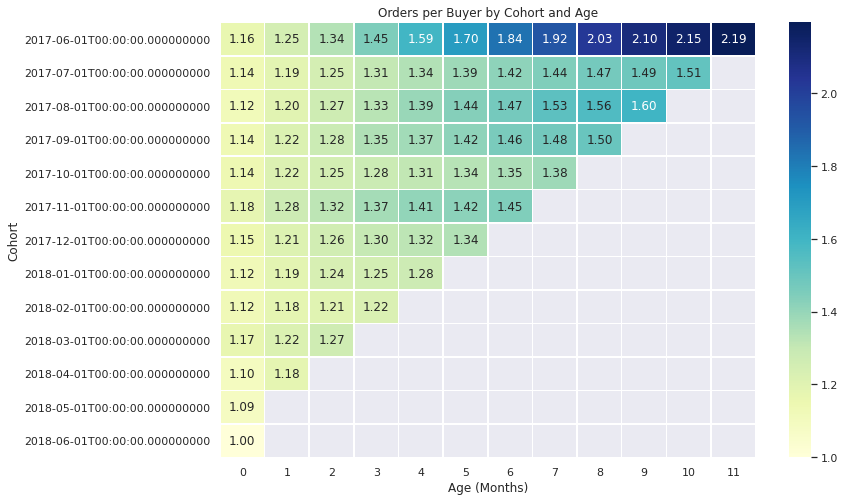

In [67]:
#redondeamosy sustituimos valorres Nan
num_orders_rounded = num_orders.round(2).fillna('')

# mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(num_orders, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=.5)
plt.title('Orders per Buyer by Cohort and Age')
plt.xlabel('Age (Months)')
plt.ylabel('Cohort')
plt.show()

Como generalidad vemos que hay una compra por cohorte (excepto en el cohorte de junio). Es hasta el quinto mes, donde hay un aumento en ventas en la mayoria de los cohortes, siendo mas pronunciado en Junio 2017

**¿Cuántos pedidos hacen durante un período de tiempo dado?**

In [68]:
first_purchase_dates = orders.groupby('uid')['buy_ts'].min()
first_purchase_dates.name = 'first_purchase_datetime'
orders = orders.merge(first_purchase_dates,on='uid')
orders['purchase_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['first_purchase_month'] = orders['first_purchase_datetime'].astype('datetime64[M]')
orders_pivot = orders.pivot_table(index='first_purchase_month',columns='purchase_month',values='revenue_x',aggfunc='sum')
orders_pivot

purchase_month        2017-06-01  2017-07-01  2017-08-01  2017-09-01  \
first_purchase_month                                                   
2017-06-01               9557.49      981.82      885.34     1931.30   
2017-07-01                   NaN    11557.65      644.61     1199.05   
2017-08-01                   NaN         NaN     7228.83      646.63   
2017-09-01                   NaN         NaN         NaN    14568.53   
2017-10-01                   NaN         NaN         NaN         NaN   
2017-11-01                   NaN         NaN         NaN         NaN   
2017-12-01                   NaN         NaN         NaN         NaN   
2018-01-01                   NaN         NaN         NaN         NaN   
2018-02-01                   NaN         NaN         NaN         NaN   
2018-03-01                   NaN         NaN         NaN         NaN   
2018-04-01                   NaN         NaN         NaN         NaN   
2018-05-01                   NaN         NaN         NaN         NaN   
2018-06-01                   NaN         NaN         NaN         NaN   

purchase_month        2017-10-01  2017-11-01  2017-12-01  2018-01-01  \
first_purchase_month                                                   
2017-06-01               2068.58     1487.92     1922.74     1176.56   
2017-07-01                690.31      339.97      300.08      231.16   
2017-08-01                628.12      536.05      676.85      388.45   
2017-09-01               2884.49     1344.52    10261.52     1033.84   
2017-10-01              21716.20     2325.21      830.65      682.01   
2017-11-01                   NaN    21036.26     1629.27      814.39   
2017-12-01                   NaN         NaN    20767.49     1141.22   
2018-01-01                   NaN         NaN         NaN    13949.50   
2018-02-01                   NaN         NaN         NaN         NaN   
2018-03-01                   NaN         NaN         NaN         NaN   
2018-04-01                   NaN         NaN         NaN         NaN   
2018-05-01                   NaN         NaN         NaN         NaN   
2018-06-01                   NaN         NaN         NaN         NaN   

purchase_month        2018-02-01  2018-03-01  2018-04-01  2018-05-01  \
first_purchase_month                                                   
2017-06-01               1119.15     1225.51     1155.66      519.62   
2017-07-01                272.72      310.05      282.96      299.36   
2017-08-01                288.61      554.86      400.33      257.53   
2017-09-01               1670.08     1810.85      627.57      474.92   
2017-10-01                657.77      522.37      368.10      501.14   
2017-11-01               1326.13      604.04      219.88      469.02   
2017-12-01               4054.70     4669.10     1371.57     1481.66   
2018-01-01                994.22     1026.34      481.59      211.48   
2018-02-01              15177.16     1015.98      286.66      270.70   
2018-03-01                   NaN    17095.49     1063.05     1114.87   
2018-04-01                   NaN         NaN    10600.69     1209.92   
2018-05-01                   NaN         NaN         NaN    13925.76   
2018-06-01                   NaN         NaN         NaN         NaN   

purchase_month        2018-06-01  
first_purchase_month              
2017-06-01                   NaN  
2017-07-01                   NaN  
2017-08-01                   NaN  
2017-09-01                   NaN  
2017-10-01                   NaN  
2017-11-01                   NaN  
2017-12-01                   NaN  
2018-01-01                   NaN  
2018-02-01                   NaN  
2018-03-01                   NaN  
2018-04-01                   NaN  
2018-05-01                   NaN  
2018-06-01                  3.42

In [69]:
# Calculate the number of orders by cohort and purchase month
orders_count_pivot = orders.pivot_table(index='first_purchase_month',
                                        columns='purchase_month',
                                        values='revenue_x',
                                        aggfunc='count')

# Display the pivot table
orders_count_pivot

purchase_month        2017-06-01  2017-07-01  2017-08-01  2017-09-01  \
first_purchase_month                                                   
2017-06-01                2354.0       177.0       174.0       226.0   
2017-07-01                   NaN      2186.0       100.0       120.0   
2017-08-01                   NaN         NaN      1533.0       108.0   
2017-09-01                   NaN         NaN         NaN      2933.0   
2017-10-01                   NaN         NaN         NaN         NaN   
2017-11-01                   NaN         NaN         NaN         NaN   
2017-12-01                   NaN         NaN         NaN         NaN   
2018-01-01                   NaN         NaN         NaN         NaN   
2018-02-01                   NaN         NaN         NaN         NaN   
2018-03-01                   NaN         NaN         NaN         NaN   
2018-04-01                   NaN         NaN         NaN         NaN   
2018-05-01                   NaN         NaN         NaN         NaN   
2018-06-01                   NaN         NaN         NaN         NaN   

purchase_month        2017-10-01  2017-11-01  2017-12-01  2018-01-01  \
first_purchase_month                                                   
2017-06-01                 292.0       218.0       276.0       174.0   
2017-07-01                 104.0        72.0        82.0        61.0   
2017-08-01                 100.0        81.0        85.0        62.0   
2017-09-01                 219.0       161.0       164.0        67.0   
2017-10-01                4964.0       314.0       162.0       122.0   
2017-11-01                   NaN      4813.0       397.0       182.0   
2017-12-01                   NaN         NaN      5052.0       270.0   
2018-01-01                   NaN         NaN         NaN      3783.0   
2018-02-01                   NaN         NaN         NaN         NaN   
2018-03-01                   NaN         NaN         NaN         NaN   
2018-04-01                   NaN         NaN         NaN         NaN   
2018-05-01                   NaN         NaN         NaN         NaN   
2018-06-01                   NaN         NaN         NaN         NaN   

purchase_month        2018-02-01  2018-03-01  2018-04-01  2018-05-01  \
first_purchase_month                                                   
2017-06-01                 212.0       153.0        96.0        86.0   
2017-07-01                  50.0        58.0        24.0        53.0   
2017-08-01                  49.0        78.0        46.0        46.0   
2017-09-01                 109.0       108.0        56.0        61.0   
2017-10-01                 129.0       103.0        86.0       125.0   
2017-11-01                 211.0       136.0        59.0       102.0   
2017-12-01                 202.0       179.0        86.0       105.0   
2018-01-01                 224.0       159.0        64.0        78.0   
2018-02-01                4095.0       222.0        83.0        70.0   
2018-03-01                   NaN      4130.0       178.0       176.0   
2018-04-01                   NaN         NaN      2495.0       195.0   
2018-05-01                   NaN         NaN         NaN      3249.0   
2018-06-01                   NaN         NaN         NaN         NaN   

purchase_month        2018-06-01  
first_purchase_month              
2017-06-01                   NaN  
2017-07-01                   NaN  
2017-08-01                   NaN  
2017-09-01                   NaN  
2017-10-01                   NaN  
2017-11-01                   NaN  
2017-12-01                   NaN  
2018-01-01                   NaN  
2018-02-01                   NaN  
2018-03-01                   NaN  
2018-04-01                   NaN  
2018-05-01                   NaN  
2018-06-01                   1.0

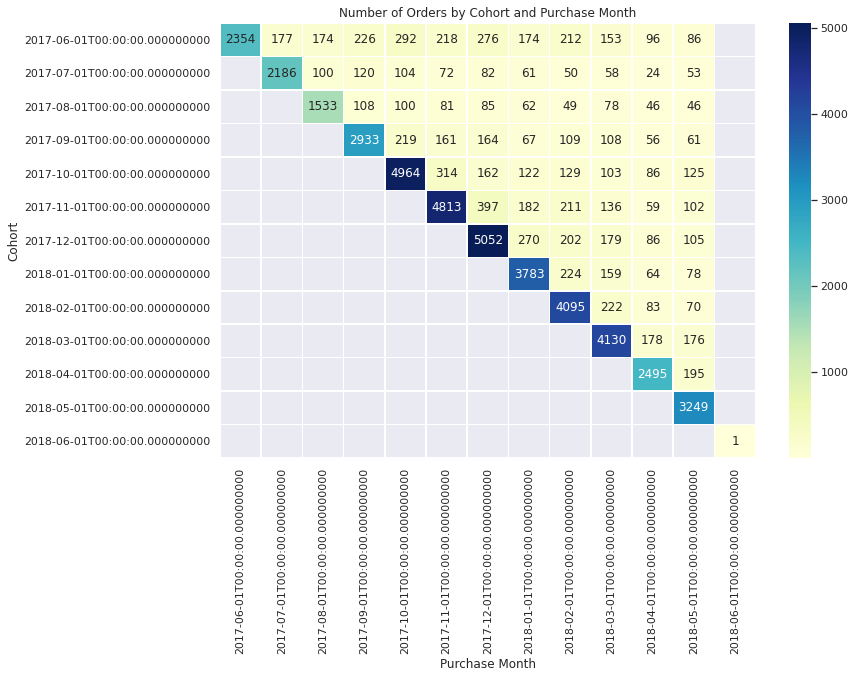

In [70]:

#mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(orders_count_pivot, cmap='YlGnBu', annot=True, fmt='g', linewidths=0.5)
plt.title('Number of Orders by Cohort and Purchase Month')
plt.xlabel('Purchase Month')
plt.ylabel('Cohort')
plt.show()


**¿Cuál es el tamaño promedio de compra?**

In [71]:
print('Tamaño promedio de compra:', orders['revenue_x'].mean().round(2))

Tamaño promedio de compra: 5.0


Ahora definiremos los ingresos promedio para cada cohorte:

In [72]:
avg_order_cohorts = orders.groupby(['cohort', 'month'])['revenue_x'].mean().reset_index()
avg_order_cohorts['age'] = ((avg_order_cohorts['month'] - avg_order_cohorts['cohort']) /
                            np.timedelta64(1, 'M')).round().astype('int')
avg_order_cohorts.head()

cohort      month  revenue_x  age
0 2017-06-01 2017-06-01   4.060106    0
1 2017-06-01 2017-07-01   5.547006    1
2 2017-06-01 2017-08-01   5.088161    2
3 2017-06-01 2017-09-01   8.545575    3
4 2017-06-01 2017-10-01   7.084178    4

In [73]:
avg_order = avg_order_cohorts.pivot_table(index = 'cohort', columns = 'age', values = 'revenue_x', aggfunc = 'mean')
avg_order.round(2).fillna('')

age           0      1      2      3      4      5      6      7     8   \
cohort                                                                    
2017-06-01  4.06   5.55   5.09   8.55   7.08   6.83   6.97   6.76  5.28   
2017-07-01  5.29   6.45   9.99   6.64   4.72   3.66   3.79   5.45  5.35   
2017-08-01  4.72   5.99   6.28   6.62   7.96   6.27   5.89   7.11   8.7   
2017-09-01  4.97  13.17   8.35  62.57  15.43  15.32  16.77  11.21  7.79   
2017-10-01  4.37   7.41   5.13   5.59    5.1   5.07   4.28   4.01         
2017-11-01  4.37    4.1   4.47   6.28   4.44   3.73    4.6                
2017-12-01  4.11   4.23  20.07  26.08  15.95  14.11                       
2018-01-01  3.69   4.44   6.45   7.52   2.71                              
2018-02-01  3.71   4.58   3.45   3.87                                     
2018-03-01  4.14   5.97   6.33                                            
2018-04-01  4.25    6.2                                                   
2018-05-01  4.29                                                          
2018-06-01  3.42                                                          

age            9      10    11  
cohort                          
2017-06-01   8.01  12.04  6.04  
2017-07-01  11.79   5.65        
2017-08-01    5.6               
2017-09-01                      
2017-10-01                      
2017-11-01                      
2017-12-01                      
2018-01-01                      
2018-02-01                      
2018-03-01                      
2018-04-01                      
2018-05-01                      
2018-06-01

Conclusión

Aquí podemos mencionar una especie de "explosión" para la cohorte de septiembre, que tiene un "salto" en el tercer mes (diciembre) y un nivel alto también en el cuarto, quinto y sexto mes. También podemos mencionar un gran aumento para la cohorte de diciembre en el segundo y tercer mes, y un alto nivel en el cuarto y quinto.


## ¿Cuánto dinero traen? (LTV)

In [74]:
ltv_cohorts = orders.groupby(['cohort', 'month'])['revenue_x'].sum().reset_index()
ltv_cohorts.columns = ['cohort', 'month', 'total_revenue']
ltv_cohorts.head()

cohort      month  total_revenue
0 2017-06-01 2017-06-01        9557.49
1 2017-06-01 2017-07-01         981.82
2 2017-06-01 2017-08-01         885.34
3 2017-06-01 2017-09-01        1931.30
4 2017-06-01 2017-10-01        2068.58

In [75]:
ltv_cohorts = ltv_cohorts.merge(cohort_size, on = ['cohort'])
ltv_cohorts['age'] = ((ltv_cohorts['month'] - ltv_cohorts['cohort']) / np.timedelta64(1, 'M')).round().astype('int')

In [76]:
ltv_cohorts['ltv'] = ltv_cohorts['total_revenue'] / ltv_cohorts['cohort_size']
ltv_cohorts.head()

cohort      month  total_revenue  cohort_size  age       ltv
0 2017-06-01 2017-06-01        9557.49         2023    0  4.724414
1 2017-06-01 2017-07-01         981.82         2023    1  0.485329
2 2017-06-01 2017-08-01         885.34         2023    2  0.437637
3 2017-06-01 2017-09-01        1931.30         2023    3  0.954671
4 2017-06-01 2017-10-01        2068.58         2023    4  1.022531

In [77]:
ltv = ltv_cohorts.pivot_table(index = 'cohort', columns = 'age', values = 'ltv', aggfunc = 'sum').cumsum(axis=1)
ltv.round(2).fillna('')

age           0     1     2      3      4      5      6      7      8      9   \
cohort                                                                          
2017-06-01  4.72  5.21  5.65    6.6   7.62   8.36   9.31   9.89  10.45  11.05   
2017-07-01  6.01  6.35  6.97   7.33    7.5   7.66   7.78   7.92   8.08   8.23   
2017-08-01  5.28  5.75  6.21    6.6   7.09   7.38   7.59   7.99   8.28   8.47   
2017-09-01  5.64  6.76  7.28  11.26  11.66  12.31  13.01  13.25  13.44          
2017-10-01  5.00  5.54  5.73   5.89   6.04   6.16   6.24   6.36                 
2017-11-01  5.15  5.55  5.75   6.08   6.23   6.28    6.4                        
2017-12-01  4.74   5.0  5.92   6.99    7.3   7.64                               
2018-01-01  4.14  4.43  4.73   4.88   4.94                                      
2018-02-01  4.16  4.44  4.51   4.59                                             
2018-03-01  4.84  5.14  5.46                                                    
2018-04-01  4.66  5.19                                                          
2018-05-01  4.66                                                                
2018-06-01  3.42                                                                

age            10     11  
cohort                    
2017-06-01  11.62  11.88  
2017-07-01   8.39         
2017-08-01                
2017-09-01                
2017-10-01                
2017-11-01                
2017-12-01                
2018-01-01                
2018-02-01                
2018-03-01                
2018-04-01                
2018-05-01                
2018-06-01

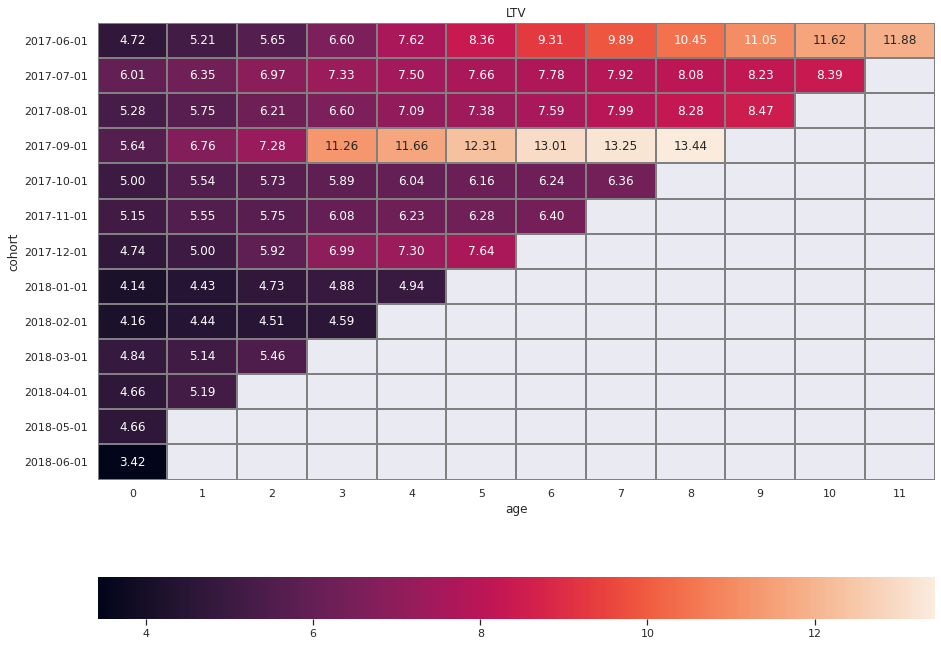

In [78]:
ltv.index = ltv.index.astype(str)
plt.figure(figsize=(15, 12))
sns.heatmap(ltv, annot=True, fmt='.2f', linewidths=1, 
            linecolor='grey', cbar_kws= {'orientation': 'horizontal'}).set(title ='LTV')
plt.show()

La cohorte de junio de 2017 tuvo la duración más larga de LTV y, por lo tanto, contribuyó con el mayor tiempo. Sin embargo, la cohorte de septiembre de 2017 tuvo el LTV más alto durante toda su duración. Mayo y junio de 2018 tuvieron los niveles más bajos. Se necesita más información saber para ver qué impulso y desalento las compras de los usuarios.

## Marketing:
 
* ¿Cuánto dinero se gastó?  (Total/por fuente/a lo largo del tiempo)
* ¿Cuánto costó la adquisición de clientes de cada una de las fuentes?
* ¿Cuán rentables eran las inversiones? (ROI)

In [79]:
costs.head()

source_id         dt  costs
0         1 2017-06-01  75.20
1         1 2017-06-02  62.25
2         1 2017-06-03  36.53
3         1 2017-06-04  55.00
4         1 2017-06-05  57.08

In [80]:
costs['first_order_month'] = costs['dt'].astype('datetime64[M]') 
costs.head()

source_id         dt  costs first_order_month
0         1 2017-06-01  75.20        2017-06-01
1         1 2017-06-02  62.25        2017-06-01
2         1 2017-06-03  36.53        2017-06-01
3         1 2017-06-04  55.00        2017-06-01
4         1 2017-06-05  57.08        2017-06-01

In [81]:
print("La cantidad de dinero gastado a lo largo del tiempo es $ {:,}:".format(costs['costs'].sum()))

La cantidad de dinero gastado a lo largo del tiempo es $ 329,131.62:


### ¿Cuánto costó la adquisición de clientes de cada una de las fuentes?

source_id      costs
0         3  141321.63
1         4   61073.60
2         5   51757.10
3         2   42806.04
4         1   20833.27
5        10    5822.49
6         9    5517.49

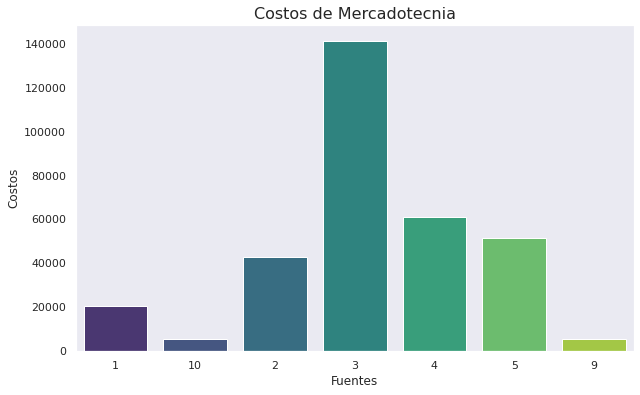

In [82]:
costs_source = costs.groupby('source_id')['costs'].sum()
costs_source = costs_source.sort_values(ascending=False).reset_index()
display(costs_source)


plt.figure(figsize=(10, 6))
sns.barplot(x='source_id', y='costs', data=costs_source, palette='viridis')
plt.title('Costos de Mercadotecnia', fontsize=16)
plt.ylabel('Costos', fontsize=12)
plt.xlabel('Fuentes', fontsize=12)
plt.show()

La fuente 3 represento el mayor gasto, seguido de la fuente 4 y 5. 

**Gastos mensuales:** 

In [83]:
costs['cost_month'] = costs.dt.astype('datetime64[M]')
costs_month = costs.groupby('cost_month')['costs'].sum().reset_index()
costs_month.columns = ['month', 'month_costs']
display(costs_month)

month  month_costs
0  2017-06-01     18015.00
1  2017-07-01     18240.59
2  2017-08-01     14790.54
3  2017-09-01     24368.91
4  2017-10-01     36322.88
5  2017-11-01     37907.88
6  2017-12-01     38315.35
7  2018-01-01     33518.52
8  2018-02-01     32723.03
9  2018-03-01     30415.27
10 2018-04-01     22289.38
11 2018-05-01     22224.27

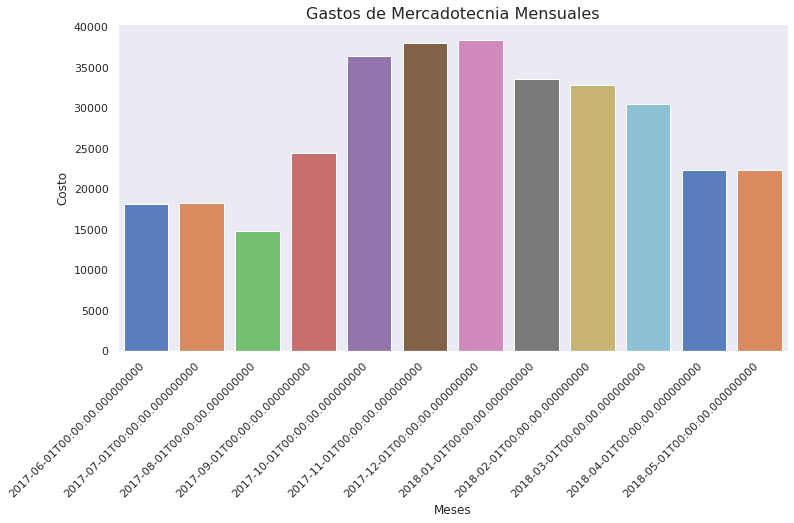

In [84]:
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='month_costs', data=costs_month, palette='muted')
plt.title('Gastos de Mercadotecnia Mensuales', fontsize=16)
plt.ylabel('Costo', fontsize=12)
plt.xlabel('Meses', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

El gasto mensual de marketing muestra una progresión natural durante el período. 6 de los meses el gasto de marketing es inferior a 25.000 dólares. Noviembre y diciembre tienen el gasto de marketing más alto, lo que podría deberse a la temporada navideña. Todas las empresas están tratando de sacar provecho del dinero de las compras navideñas, por lo que tiene sentido que se haga un mayor esfuerzo para captar clientes durante ese tiempo.

In [85]:
#Vamos a sumar costos por fuente

expen_source = costs.groupby(['source_id', 'first_order_month'])['costs'].sum().reset_index()
pd.options.display.float_format = '{:,.2f}'.format #format number to have commas
expen_source.head()

source_id first_order_month    costs
0         1        2017-06-01 1,125.61
1         1        2017-07-01 1,072.88
2         1        2017-08-01   951.81
3         1        2017-09-01 1,502.01
4         1        2017-10-01 2,315.75

In [86]:
fig_exps = px.line(expen_source, x="first_order_month", y="costs",color='source_id',title='Gasto de Mercadotecnia por Fuente- mensual')#changed date to month
fig_exps.show()

**Veamos los costos de adquisicion de clientes (CAC)**

In [87]:
costs.head()

source_id         dt  costs first_order_month cost_month
0         1 2017-06-01  75.20        2017-06-01 2017-06-01
1         1 2017-06-02  62.25        2017-06-01 2017-06-01
2         1 2017-06-03  36.53        2017-06-01 2017-06-01
3         1 2017-06-04  55.00        2017-06-01 2017-06-01
4         1 2017-06-05  57.08        2017-06-01 2017-06-01

Se tienen que ver la cantidad generada para atraer clientes por mes

In [88]:
costs_by_month = costs.groupby(['cost_month'])['costs'].sum().reset_index()
costs_by_month.columns = ['cost_month', 'costs_in_month']
costs_by_month.head()

cost_month  costs_in_month
0 2017-06-01       18,015.00
1 2017-07-01       18,240.59
2 2017-08-01       14,790.54
3 2017-09-01       24,368.91
4 2017-10-01       36,322.88

Ya habiamos definido anteriormente el numero de compradores por mes

In [89]:
num_buyers_per_month = orders.groupby(['cohort'])['uid'].nunique().reset_index()
num_buyers_per_month.columns = ['cost_month', 'num_buyers']
num_buyers_per_month.head()

cost_month  num_buyers
0 2017-06-01        2023
1 2017-07-01        1923
2 2017-08-01        1370
3 2017-09-01        2581
4 2017-10-01        4340

Entonces para obtener el CAC se uniran las tablas creando dicha columna dividiendo el monto total / el numero de compradores

In [90]:
CAC_per_month = costs_by_month.merge(num_buyers_per_month, how = 'left', on = ['cost_month'])
CAC_per_month['CAC'] = CAC_per_month['costs_in_month'] / CAC_per_month['num_buyers']
CAC_per_month.head()

cost_month  costs_in_month  num_buyers   CAC
0 2017-06-01       18,015.00        2023  8.91
1 2017-07-01       18,240.59        1923  9.49
2 2017-08-01       14,790.54        1370 10.80
3 2017-09-01       24,368.91        2581  9.44
4 2017-10-01       36,322.88        4340  8.37

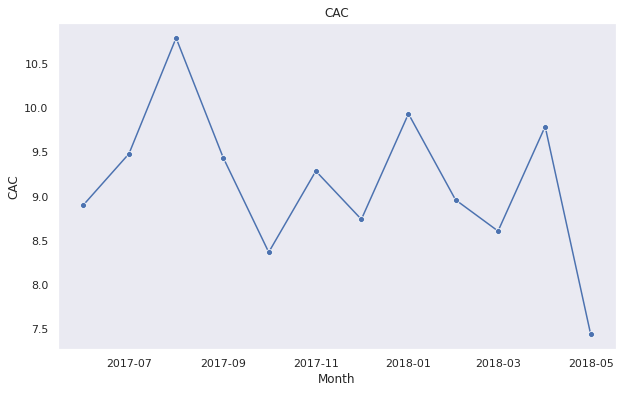

In [91]:
# grafico de linea
plt.figure(figsize=(10, 6))
sns.lineplot(data=CAC_per_month, x='cost_month', y='CAC', marker='o')
plt.title('CAC')
plt.xlabel('Month')
plt.ylabel('CAC')
plt.show()

El grafico muestra que el costo mas alto de adquisicion de clientes anda en $11 mientras que el mas bajo en $7, mostrado un cambio constante de mes a mes.

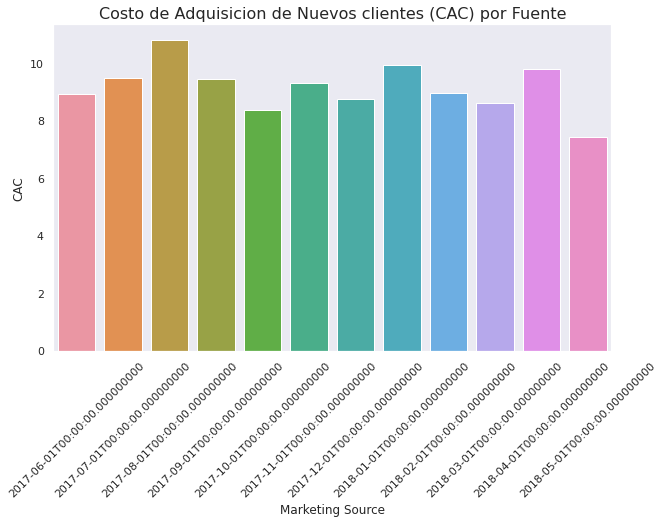

In [92]:


#plt.figure(figsize=(10, 6
plt.figure(figsize=(10, 6)) # MODIFICADO POR REVISOR
sns.barplot(data=CAC_per_month, x='cost_month', y='CAC')

plt.title('Costo de Adquisicion de Nuevos clientes (CAC) por Fuente', fontsize=16)
plt.xlabel('Marketing Source', fontsize=12)
plt.ylabel('CAC', fontsize=12)
plt.xticks(rotation=45)

plt.show()


El costo mas alto se presento en julio 2017 y el mas bajo en mayo 2018.


La fuente 3 tiene el costo de adquisición de clientes (CAC) más alto con 10.21, lo que significa que es relativamente costoso adquirir cada cliente de esta fuente. A pesar del alto CAC, Source 3 ha incorporado con éxito a un número alto de clientes (13.846). Sin embargo, la rentabilidad de esta fuente es cuestionable ya que tiene un CAC relativamente alto.

La Fuente 2 demuestra un buen equilibrio entre CAC e ingresos. Tiene un CAC moderado (5,86) y ha atraído a un número sustancial de clientes (7.305) que contribuyeron significativamente a los ingresos (2,638,189,00).
La Fuente 2 parece ser una campaña de marketing rentable, ya que ha generado una cantidad considerable de ingresos con un CAC razonable. Esta fuente se ha convertido en la fuente más lucrativa en términos de ingresos

La Fuente 5 destaca por ser una campaña de marketing eficiente con un CAC bajo (5,10) y un número sustancial de nuevos compradores (10.156).El equilibrio logrado por Fuente 5 entre adquirir clientes a un costo razonable y generar ingresos indica su efectividad.


Con estos datos quizas seria util combinar esfuerzos entre la Fuente 2 (altos ingresos) y la Fuente 4 (gran número de nuevos compradores). La combinación de estos esfuerzos podría maximizar tanto la base de clientes como los ingresos, lo que podría conducir a una estrategia general de marketing más equilibrada y eficaz.

## CAC por fuente

In [93]:
visits.head(2)

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   

                    uid  session_year  session_month  session_week  \
0  16879256277535980062          2017             12            51   
1    104060357244891740          2018              2             8   

  session_date  session_duration_sec first_visit_date first_visit_month  \
0   2017-12-20                  1080       2017-12-20        2017-12-01   
1   2018-02-19                  1680       2018-02-19        2018-02-01   

  visit_month  cohort_lifetime  
0  2017-12-01                0  
1  2018-02-01                0

In [94]:
#first source
first_sourcev=visits.sort_values('session_date').groupby('uid').first()['source_id'].reset_index()
first_sourcev.columns=['uid','first_source']
first_sourcev.head()

uid  first_source
0   11863502262781             3
1   49537067089222             2
2  297729379853735             3
3  313578113262317             2
4  325320750514679             5

In [95]:
orders.head(1)

buy_ts  revenue_x                   uid      month       week  \
0 2017-06-01 00:10:00      17.00  10329302124590727494 2017-06-01 2017-06-01   

         date    first_order_date  revenue_y     cohort  \
0  2017-06-01 2017-06-01 00:10:00      17.00 2017-06-01   

  first_purchase_datetime purchase_month first_purchase_month  
0     2017-06-01 00:10:00     2017-06-01           2017-06-01

In [96]:
first_source_order = orders.merge(first_sourcev, how = 'left', on = 'uid')
first_source_order.head()

buy_ts  revenue_x                   uid      month       week  \
0 2017-06-01 00:10:00      17.00  10329302124590727494 2017-06-01 2017-06-01   
1 2017-06-01 00:25:00       0.55  11627257723692907447 2017-06-01 2017-06-01   
2 2017-06-01 00:27:00       0.37  17903680561304213844 2017-06-01 2017-06-01   
3 2017-06-01 00:29:00       0.55  16109239769442553005 2017-06-01 2017-06-01   
4 2017-06-01 07:58:00       0.37  14200605875248379450 2017-06-01 2017-06-01   

         date    first_order_date  revenue_y     cohort  \
0  2017-06-01 2017-06-01 00:10:00      17.00 2017-06-01   
1  2017-06-01 2017-06-01 00:25:00       0.55 2017-06-01   
2  2017-06-01 2017-06-01 00:27:00       0.37 2017-06-01   
3  2017-06-01 2017-06-01 00:29:00       0.55 2017-06-01   
4  2017-06-01 2017-06-01 07:58:00       0.37 2017-06-01   

  first_purchase_datetime purchase_month first_purchase_month  first_source  
0     2017-06-01 00:10:00     2017-06-01           2017-06-01             1  
1     2017-06-01 00:25:00     2017-06-01           2017-06-01             2  
2     2017-06-01 00:27:00     2017-06-01           2017-06-01             2  
3     2017-06-01 00:29:00     2017-06-01           2017-06-01             2  
4     2017-06-01 07:58:00     2017-06-01           2017-06-01             3

In [98]:


#suma de costo de clientes por fuente y mes
costs_by_month_source = costs.groupby(['cost_month', 'source_id'])['costs'].sum().reset_index()

# Convert the 'costs' column to a numeric data type
costs_by_month_source['costs'] = pd.to_numeric(costs_by_month_source['costs'], errors='coerce')
costs_by_month_source['source_id'] = costs_by_month_source['source_id'].astype('int64')


costs_by_month_source.head()
costs_by_month_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   cost_month  84 non-null     datetime64[ns]
 1   source_id   84 non-null     int64         
 2   costs       84 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.1 KB


In [99]:
#numero de clientes por mes y por fuente
buyers_per_month_source = first_source_order.groupby(['cohort', 'first_source'])['uid'].nunique().reset_index()
buyers_per_month_source.columns = ['cost_month', 'source_id', 'num_buyers']
buyers_per_month_source.head()
buyers_per_month_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   cost_month  86 non-null     datetime64[ns]
 1   source_id   86 non-null     int64         
 2   num_buyers  86 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.1 KB


In [100]:
#calcular CAC pr cliente

CAC_per_month_source = costs_by_month_source.merge(buyers_per_month_source, on=['cost_month', 'source_id'], how='outer')

CAC_per_month_source['CAC'] = CAC_per_month_source['costs'] / CAC_per_month_source['num_buyers']


CAC_per_month_source.head()


cost_month  source_id    costs  num_buyers   CAC
0 2017-06-01          1 1,125.61         218  5.16
1 2017-06-01         10   314.22          94  3.34
2 2017-06-01          2 2,427.38         236 10.29
3 2017-06-01          3 7,731.65         618 12.51
4 2017-06-01          4 3,514.80         401  8.77

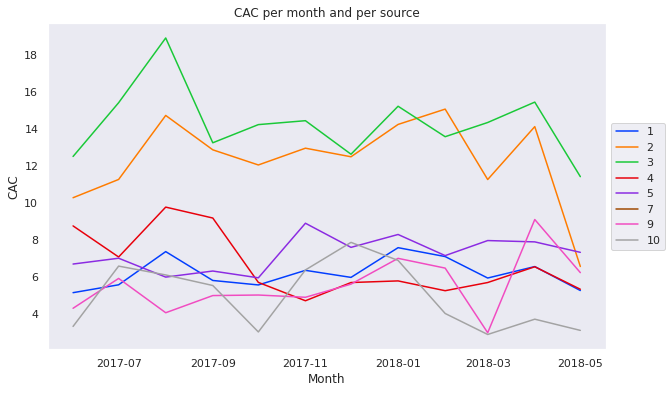

In [101]:

num_categories = len(CAC_per_month_source['source_id'].unique())

palette = sns.color_palette("bright", num_categories)
plt.figure(figsize=(10, 6))
sns.lineplot(data=CAC_per_month_source, x="cost_month", y="CAC", hue="source_id", palette=palette)


plt.title('CAC per month and per source')
plt.xlabel('Month')
plt.ylabel('CAC')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


Parece que todas las fuentes son diferentes y tienen diferentes tendencias en distintos periodos. Eso si,  las fuentes 2 y 3 son las mas costosas y tienen una tendencia similar entre septiembre y marzo, la fuente 4 despues de octubre se vuelve recta y el resto de fuentes varían de mes a mes.

## ROI

In [106]:
CAC_per_month_ROI = CAC_per_month[['cost_month', 'CAC']]
CAC_per_month_ROI.columns = ['cohort', 'CAC']
ROI = ltv_cohorts.merge(CAC_per_month_ROI, how = 'left', on = ['cohort'])
ROI.head()

cohort      month  total_revenue  cohort_size  age  ltv  CAC
0 2017-06-01 2017-06-01       9,557.49         2023    0 4.72 8.91
1 2017-06-01 2017-07-01         981.82         2023    1 0.49 8.91
2 2017-06-01 2017-08-01         885.34         2023    2 0.44 8.91
3 2017-06-01 2017-09-01       1,931.30         2023    3 0.95 8.91
4 2017-06-01 2017-10-01       2,068.58         2023    4 1.02 8.91

In [107]:
ROI['ROI']=ROI['ltv']/ROI['CAC']
roi_piv = ROI.pivot_table(index='cohort', columns='age', values='ROI', aggfunc='mean').cumsum(axis=1)
roi_piv.round(2).fillna('') 

age          0    1    2    3    4    5    6    7    8    9    10   11
cohort                                                                
2017-06-01 0.53 0.59 0.63 0.74 0.86 0.94 1.05 1.11 1.17 1.24 1.31 1.33
2017-07-01 0.63 0.67 0.73 0.77 0.79 0.81 0.82 0.84 0.85 0.87 0.88     
2017-08-01 0.49 0.53 0.57 0.61 0.66 0.68 0.70 0.74 0.77 0.78          
2017-09-01 0.60 0.72 0.77 1.19 1.23 1.30 1.38 1.40 1.42               
2017-10-01 0.60 0.66 0.68 0.70 0.72 0.74 0.75 0.76                    
2017-11-01 0.55 0.60 0.62 0.65 0.67 0.68 0.69                         
2017-12-01 0.54 0.57 0.68 0.80 0.84 0.87                              
2018-01-01 0.42 0.45 0.48 0.49 0.50                                   
2018-02-01 0.46 0.49 0.50 0.51                                        
2018-03-01 0.56 0.60 0.63                                             
2018-04-01 0.48 0.53                                                  
2018-05-01 0.63

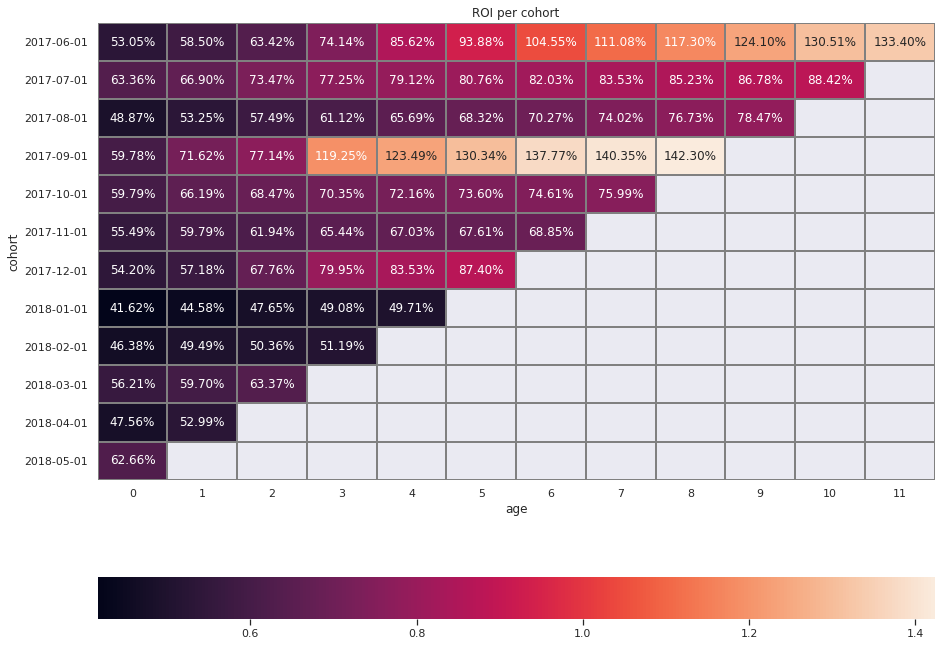

In [108]:
roi_piv.index=roi_piv.index.astype(str)
plt.figure(figsize=(15, 12))
sns.heatmap(roi_piv, annot=True, fmt='.2%', linewidths=1, 
            linecolor='grey', cbar_kws= {'orientation': 'horizontal'}).set(title ='ROI per cohort')
plt.show()

Podemos ver un panorama similar con el LTV por cohorte: podemos llamar a septiembre, junio, julio y diciembre las cohortes más exitosas en términos de retorno de las inversiones.

Vamos a calcular el ROI para cada fuente:

Adquirir cada cliente le costó a la empresa un promedio de $8.90, mientras que cada cliente generó $413 . La inversión en la adquisición de clientes valió la pena.


In [109]:
ltv_per_source = first_source_order.groupby(['first_source'])[['uid', 'revenue_x']].agg({'uid': 'nunique', 'revenue_x': 'sum'}).reset_index()

ltv_per_source.columns = ['source_id', 'num_buyers', 'total_revenue']
ltv_per_source['ltv'] = ltv_per_source['total_revenue'] / ltv_per_source['num_buyers']
ltv_per_source.head()

source_id  num_buyers  total_revenue   ltv
0          1        3383      35,529.84 10.50
1          2        3557      45,721.66 12.85
2          3       10121      51,183.42  5.06
3          4        9996      55,009.80  5.50
4          5        7104      54,478.15  7.67

In [110]:
costs_source['source_id'] = costs_source['source_id'].astype('int64')

roi_per_source = costs_source.merge(ltv_per_source, on = ['source_id'])
roi_per_source['cac'] = roi_per_source['costs'] / roi_per_source['num_buyers']
roi_per_source['romi'] = roi_per_source['ltv'] / roi_per_source['cac']
roi_per_source.head()

source_id      costs  num_buyers  total_revenue   ltv   cac  romi
0          3 141,321.63       10121      51,183.42  5.06 13.96  0.36
1          4  61,073.60        9996      55,009.80  5.50  6.11  0.90
2          5  51,757.10        7104      54,478.15  7.67  7.29  1.05
3          2  42,806.04        3557      45,721.66 12.85 12.03  1.07
4          1  20,833.27        3383      35,529.84 10.50  6.16  1.71

In [111]:
#creacion de grafico de barras
roi_per_source_sorted = roi_per_source.sort_values(by='source_id')
fig = px.bar(roi_per_source_sorted, x='source_id', y='romi', 
             title='ROMI por Fuente', labels={'source_id': 'Fuente', 'romi': 'ROMI'},
             text='romi', 
             hover_data={'romi': ':.2f'} 
            )
fig.update_xaxes(type='category')
fig.show()


Con un 1.711 de ROMI, se ve claramente que la fuente 1 es la genero mas ingresos. Las fuentes 2, 5 y 9 son similares y podemos decir que también son exitosas (a pesar de un nivel mas alto de CAC para la fuente 2)
La fuente 10 tiene un indicador tambien decente.

# 3. Conclusiones
El análisis proporciona información valiosa sobre la dinámica de adquisición de clientes, generación de ingresos y gastos de marketing. Se destacan varias observaciones clave:

Tendencias de tráfico y compras: el período comprendido entre septiembre de 2017 y marzo de 2018 fue testigo de un aumento sustancial en el tráfico del sitio web, lo que resultó en un aumento correspondiente en las compras. Esto se alinea con el crecimiento de los ingresos durante estos meses, mostrando una fuerte correlación entre el tráfico, las compras y los ingresos.

Rendimiento de la campaña de marketing: a pesar de una reducción en la inversión para la campaña de marketing 3, las campañas 4 y 5 demostraron mayores ingresos. Esto enfatiza la importancia de optimizar y asignar recursos de manera efectiva entre diferentes canales de marketing.

Período de amortización: El análisis indica un período de amortización de alrededor de 5 a 6 meses, donde el retorno acumulado de la inversión se vuelve significativo. Esta información es crucial para comprender el cronograma necesario para que los esfuerzos de marketing produzcan retornos sustanciales.

Recomendación:
Sobre la base de estas observaciones, aquí hay recomendaciones para el departamento de marketing:

Aprovechar las campañas exitosas: dado el desempeño positivo de las campañas de marketing 4 y 5, sería ventajoso asignar más recursos y esfuerzos a estas campañas durante los meses pico (de septiembre a marzo). Este enfoque estratégico puede maximizar las ganancias y capitalizar canales de marketing exitosos.

Tambien seria recomendable que el departamento  deje de desperdiciar dinero en la fuente 3. Es obvio que gasta, como vemos en los gráficos CAC por fuente: durante todo el período, la fuente 3 es líder en términos de cantidad de dinero gastada. Los gráficos ROMI dicen que la fuente 3 es lider en términos de ineficiencia, la relación LVT a CAC es 0.36, lo que significa que por $1 LTV representa casi $3 de CAC.
Parece que tres fuentes muestran nivel aceptables de exito : 1, 2 y 5, donde la relación LVT: CAC es superior a 1. Parece que la estrategia actual para la fuente 1 esta funcionando bastnte bien. pProbablemente, aumentar los presupuestos para este canal puede generar mas beneficios. Como vemos el ROMI tiene nivel alto, el CAC y el presupuesto son de los mas bajos.


Momento estratégico:  Como lo indican los importantes valores de vida útil, sugiere que se preste atencion a la retencion de usuarios. Para mejorar aún más la rentabilidad, el departamento de marketing debe coordinar estratégicamente los esfuerzos durante períodos clave, como el regreso a clases y las temporadas navideñas. Al alinear las actividades de marketing con los períodos de mayor actividad comercial, la organización puede capitalizar el comportamiento del consumidor e impulsar compras adicionales.

En resumen, las tendencias observadas resaltan el potencial de una mayor rentabilidad al centrarse en campañas exitosas, tiempos estratégicos y mantener un enfoque proactivo en la estrategia de marketing. Este enfoque integral posiciona a la organización para un éxito sostenido en un mercado competitivo.